In [2]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential, layers, callbacks
from tensorflow.keras.layers import Dense, LSTM, Dropout, GRU, Bidirectional

In [3]:
##Loading Data
UNH_df = pd.read_csv('UNH.csv')
UNH_df.name = 'UNH'
AAPL_df = pd.read_csv('AAPL.csv')
AAPL_df.name = 'AAPL'
GS_df = pd.read_csv('GS.csv')
GS_df.name = 'GS'
CAT_df = pd.read_csv('CAT.csv')
CAT_df.name = 'CAT'
MCD_df = pd.read_csv('MCD.csv')
MCD_df.name = 'MCD'
GOOG_df = pd.read_csv('GOOG.csv')
lst = [UNH_df, AAPL_df,GS_df,CAT_df,MCD_df]
##Removing Features
df = GOOG_df
df.drop('Date', axis = 1, inplace = True)
df.drop('Adj Close', axis = 1, inplace = True)
print (df.head)

<bound method NDFrame.head of               Open          High           Low         Close      Volume
0      7593.629883   7594.330078   7498.500000   7502.669922  1171420000
1      7550.660156   7589.189941   7511.430176   7586.430176  1754690000
2      7595.930176   7695.810059   7588.649902   7688.390137  1718600000
3      7731.740234   7757.279785   7702.060059   7756.200195  1844440000
4      7770.629883   7777.479980   7731.979980   7759.200195  1735230000
...            ...           ...           ...           ...         ...
1252  13468.740234  13573.570313  13334.419922  13335.780273  4430600000
1253  13389.250000  13578.799805  13366.969727  13555.669922  5053660000
1254  13506.019531  13654.139648  13495.730469  13591.750000  4533270000
1255  13592.360352  13618.530273  13540.259766  13591.330078  4388140000
1256  13719.980469  13816.679688  13716.160156  13787.919922  4661120000

[1257 rows x 5 columns]>


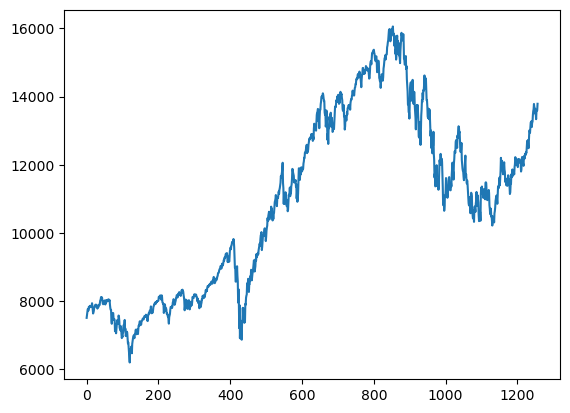

In [4]:
plt.plot(df.index,df['Close'])
plt.show()

In [5]:
def split(df):
    n_train_rows = int(df.shape[0]*.8)-1
    train = df.iloc[:n_train_rows, :]
    test = df.iloc[n_train_rows:, :]
    return train,test

In [6]:
splitdf = split(df)
train = splitdf[0]
test = splitdf[1]

In [7]:
sc = MinMaxScaler(feature_range = (0, 1))
n_train = sc.fit_transform(train.values)
n_test = sc.fit_transform(test.values)

In [8]:
x_train = []
y_train = []
steps = 20
for i in range(steps, n_train.shape[0]-steps):
    x_train.append(n_train[i-steps:i, :])
    y_train.append(n_train[i, :])

x_train, y_train = np.array(x_train), np.array(y_train)
print(x_train.shape)

(964, 20, 5)


In [9]:
x_test = []
y_test = []

for i in range(steps, n_test.shape[0]-steps):
    x_test.append(n_test[i-steps:i, :])
    y_test.append(n_test[i, :])

x_test, y_test = np.array(x_test), np.array(y_test)
print(x_test.shape)

(213, 20, 5)


In [10]:
epochs = 30
model = Sequential()
model.add(LSTM(units=50, return_sequences = True, input_shape = (x_train.shape[1],x_train.shape[2])))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences = True))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences = True))
model.add(Dropout(0.2))
model.add(LSTM(units=50))
model.add(Dropout(0.2))
model.add(Dense(units=x_train.shape[2]))
model.compile(loss="mse", optimizer="adam")
hist = model.fit(x_train, y_train, batch_size = 32, epochs = epochs)
model.summary


Epoch 1/30


2023-07-10 12:27:04.405966: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


31/31 [==============================] - 5s 27ms/step - loss: 0.0570
Epoch 2/30
31/31 [==============================] - 1s 26ms/step - loss: 0.0107
Epoch 3/30
31/31 [==============================] - 1s 25ms/step - loss: 0.0088
Epoch 4/30
31/31 [==============================] - 1s 26ms/step - loss: 0.0086
Epoch 5/30
31/31 [==============================] - 1s 27ms/step - loss: 0.0081
Epoch 6/30
31/31 [==============================] - 1s 26ms/step - loss: 0.0085
Epoch 7/30
31/31 [==============================] - 1s 27ms/step - loss: 0.0078
Epoch 8/30
31/31 [==============================] - 1s 27ms/step - loss: 0.0071
Epoch 9/30
31/31 [==============================] - 1s 26ms/step - loss: 0.0072
Epoch 10/30
31/31 [==============================] - 1s 26ms/step - loss: 0.0067
Epoch 11/30
31/31 [==============================] - 1s 26ms/step - loss: 0.0075
Epoch 12/30
31/31 [==============================] - 1s 26ms/step - loss: 0.0061
Epoch 13/30
31/31 [=============================

<bound method Model.summary of <keras.engine.sequential.Sequential object at 0x12b0bb100>>

In [11]:
print('\n# Evaluate on test data')
results = model.evaluate(x_test, y_test, batch_size=32)
print('test loss, test acc:', results)


# Evaluate on test data
7/7 [==============================] - 1s 6ms/step - loss: 0.0127
test loss, test acc: 0.01272511575371027


In [12]:
y_hat = model.predict(x_test)
y_hat = sc.inverse_transform(y_hat)

7/7 [==============================] - 1s 6ms/step


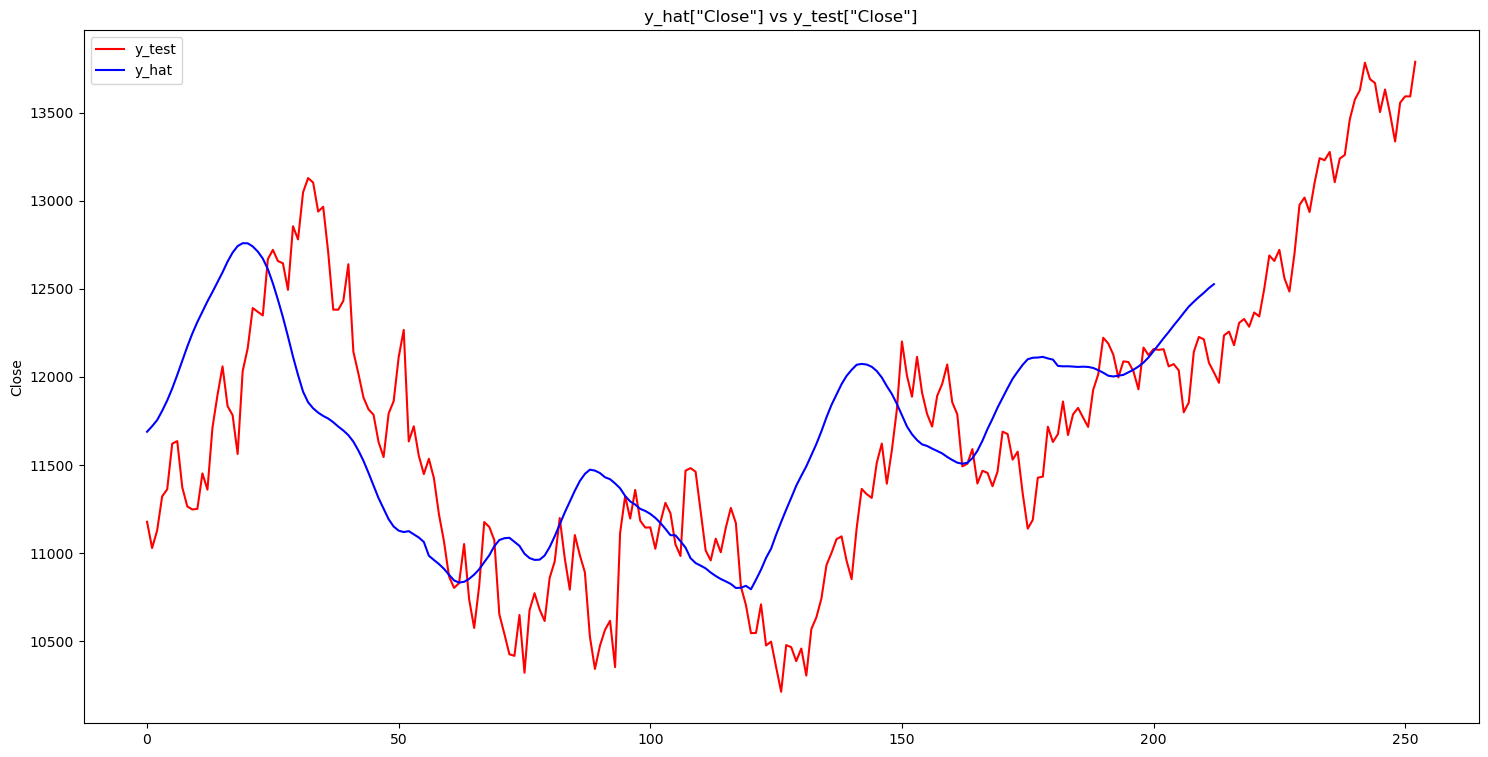

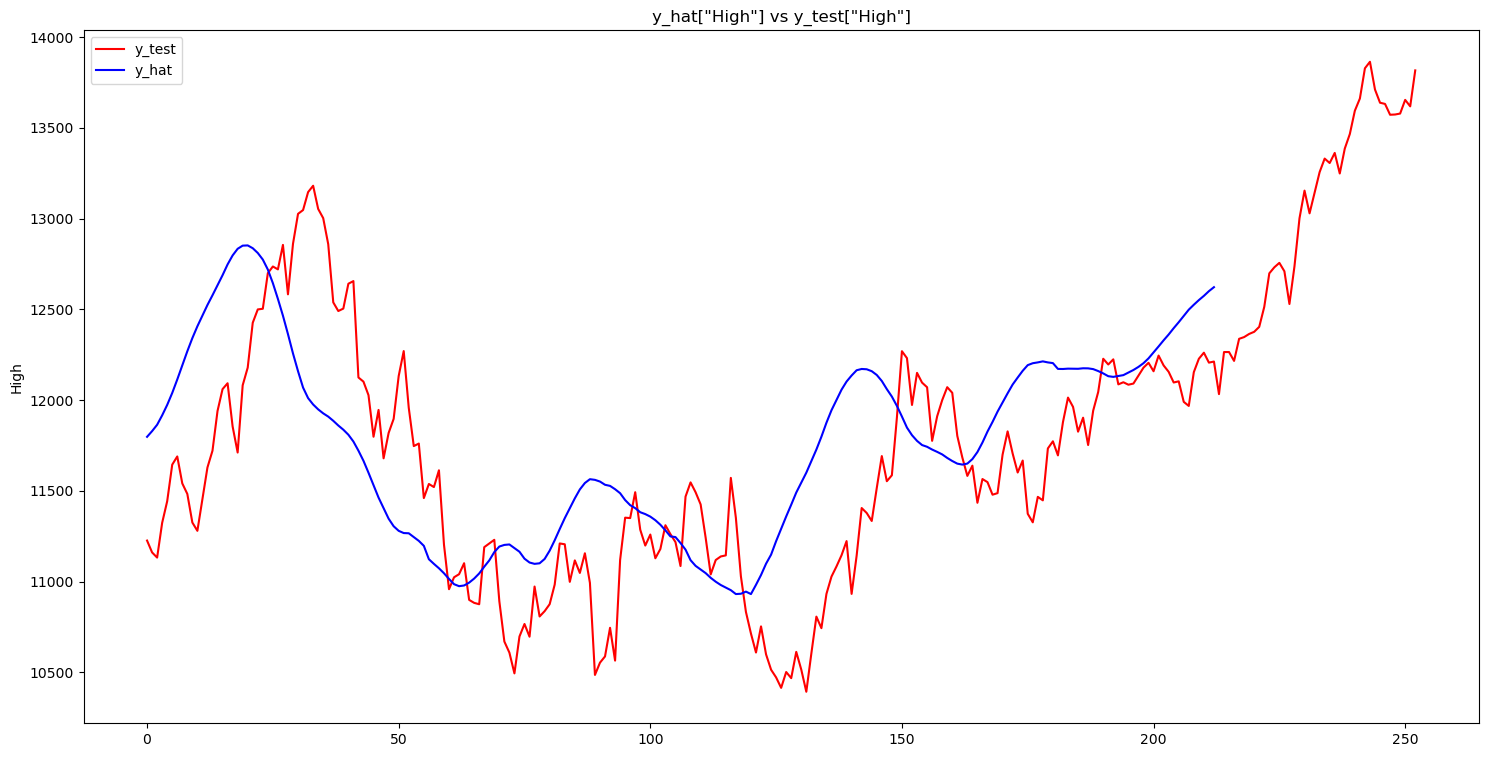

In [13]:
y_test = test.reset_index()

# Visualise the open predictions
plt.figure(figsize = (18,9))
plt.plot(y_test['Close'], color = 'red', label = 'y_test')
plt.plot(y_hat[:,3], color = 'blue', label = 'y_hat')
plt.title('y_hat["Close"] vs y_test["Close"]')
plt.ylabel('Close')
plt.legend()
plt.show()

# Visualise the close predictions
plt.figure(figsize = (18,9))
plt.plot(y_test['High'], color = 'red', label = 'y_test')
plt.plot(y_hat[:,1], color = 'blue', label = 'y_hat')
plt.title('y_hat["High"] vs y_test["High"]')
plt.ylabel('High')
plt.legend()
plt.show()
